<a href="https://colab.research.google.com/github/jatinkchaudhary/Speech-Processing-Final-Year-Project-/blob/main/testingBestAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
import keras
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
import soundfile as sf

In [ ]:
reconstructed_model = keras.models.load_model("/content/drive/MyDrive/inception_ftu24.h15")

In [ ]:
labels = ['angry','calm','disgust','fearful','happy','neutral','sad','surprised']

**TESTING PHASE BEGINS**

Here we add the spectrogram on any random image and try to get our model to predict its emotion. We can make a recorder and can get it to predict the emotion from the voice sample by making a spectrogram too.

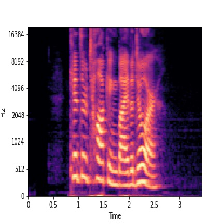

In [ ]:
from keras.applications.inception_v3 import preprocess_input
from keras.utils import to_categorical

i = '/content/drive/MyDrive/gen_dataset/train/happy/03-01-03-01-01-02-12.wav.jpeg'
image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
image

In [ ]:
image=np.array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

y_pred=reconstructed_model.predict(image)

In [ ]:
y_pred

array([[1.8678536e-03, 1.4241560e-03, 7.2116539e-02, 1.0672286e-03,
        9.1510224e-01, 4.2743282e-04, 3.0702846e-03, 4.9242163e-03]],
      dtype=float32)

In [ ]:
np.sum(y_pred)

0.99999994

The above array shows the probability of each emotion in order of the labels.

In [ ]:
k = np.argmax(y_pred)
k

4

In [ ]:
labels[k]

'happy'

**And thus, we get the correct emotion.**
Now time for dynamic recording and testing!

**ABHISHEK AUDIO FILE _ 1**



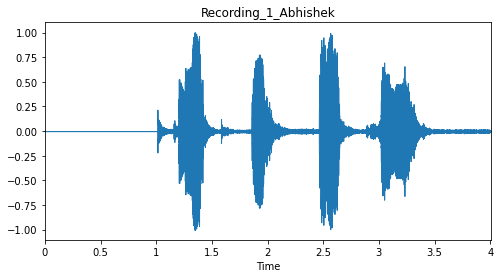

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/Recordings/Recording.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Recording_1_Abhishek')
plt.savefig('Abhishek1.png')

In [ ]:
sf.write('/content/drive/MyDrive/Recording_OP/abhi1.wav', x, sr)
Audio(data=x, rate=sr)

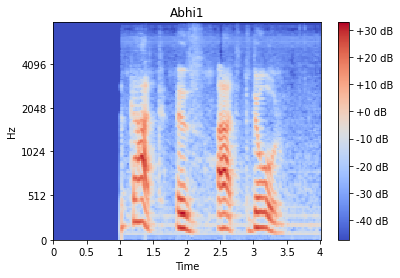

In [ ]:
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Abhi1')
plt.savefig('abhi1.png')
plt.colorbar(format='%+2.0f dB');

In [ ]:
i = '/content/abhi1.png'
image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))

In [ ]:
image=np.array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

y_pred=reconstructed_model.predict(image)

In [ ]:
np.sum(y_pred)
y_pred

array([[1.4266349e-01, 1.7468796e-04, 7.6577435e-03, 1.7086230e-03,
        8.4130937e-01, 1.4509333e-04, 5.4905554e-03, 8.5047132e-04]],
      dtype=float32)

In [ ]:
k = np.argmax(y_pred)
labels[k]

'happy'

**ABHISHEK AUDIO FILE _ 2**


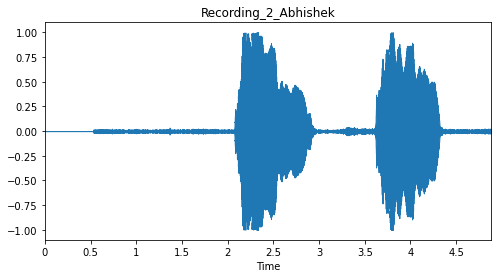

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/Recordings/Recording (2).wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Recording_2_Abhishek')
plt.savefig('Abhishek2.png')

In [ ]:
sf.write('/content/drive/MyDrive/Recording_OP/abhi2.wav', x, sr)
Audio(data=x, rate=sr)

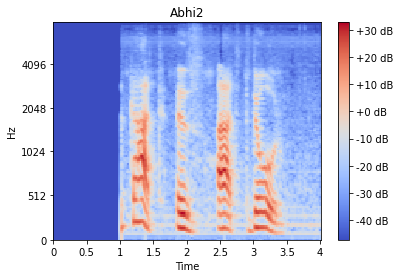

In [ ]:
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Abhi2')
plt.savefig('abhi2.png')
plt.colorbar(format='%+2.0f dB');

In [ ]:
i = '/content/abhi2.png'
image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
image=np.array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

y_pred=reconstructed_model.predict(image)
y_pred
k = np.argmax(y_pred)
labels[k]

'happy'

In [ ]:
y_pred

array([[1.7987204e-01, 2.0988857e-04, 7.3238052e-03, 1.7688840e-03,
        8.0394512e-01, 1.5363979e-04, 5.9348540e-03, 7.9164637e-04]],
      dtype=float32)

**ABHISHEK AUDIO FILE _ 3**


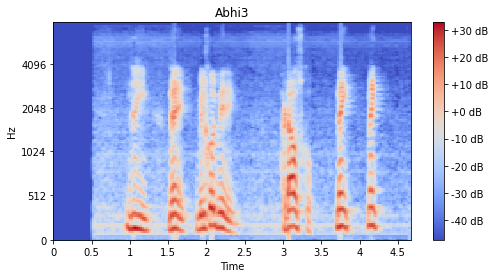

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/Recordings/Recording (3).wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Recording_3_Abhishek')
plt.savefig('Abhishek3.png')
sf.write('/content/drive/MyDrive/Recording_OP/abhi3.wav', x, sr)
Audio(data=x, rate=sr)
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Abhi3')
plt.savefig('abhi3.png')
plt.colorbar(format='%+2.0f dB');

In [ ]:
i = '/content/abhi3.png'
image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
image=np.array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

y_pred=reconstructed_model.predict(image)
y_pred
k = np.argmax(y_pred)
labels[k]

'angry'

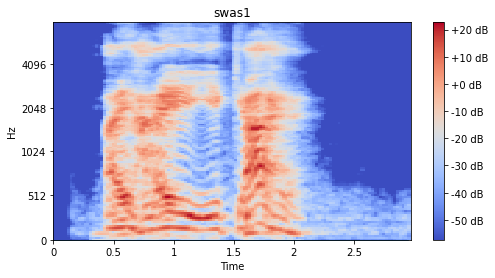

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/Recordings/Swastik_Angry.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Recording_1_Swastik')
plt.savefig('Swastik1.png')
sf.write('/content/drive/MyDrive/Recording_OP/swastik1.wav', x, sr)
Audio(data=x, rate=sr)
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('swas1')
plt.savefig('swas1.png')
plt.colorbar(format='%+2.0f dB');

In [ ]:
i = '/content/swas1.png'
image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
image=np.array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

y_pred=reconstructed_model.predict(image)
y_pred
k = np.argmax(y_pred)
labels[k]

'angry'

'disgust'

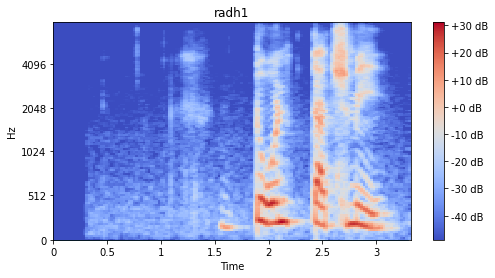

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/Recordings/F1_anger.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Recording_1_Radh')
plt.savefig('Radh1.png')
sf.write('/content/drive/MyDrive/Recording_OP/radh1.wav', x, sr)
Audio(data=x, rate=sr)
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('radh1')
plt.savefig('radh1.png')
plt.colorbar(format='%+2.0f dB');
i = '/content/radh1.png'
image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
image=np.array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

y_pred=reconstructed_model.predict(image)
y_pred
k = np.argmax(y_pred)
labels[k]

In [ ]:
y_pred

array([[0.02479166, 0.01086722, 0.5488033 , 0.07648934, 0.27379495,
        0.00468211, 0.04829936, 0.0122721 ]], dtype=float32)

'fearful'

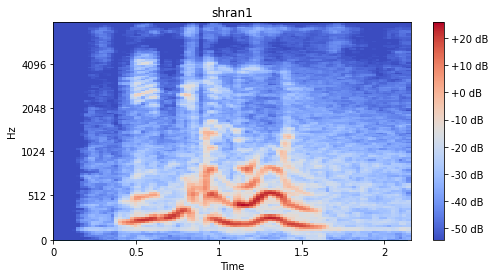

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/Recordings/F2_scared.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('F2_shran_disgust')
plt.savefig('shran1.png')
sf.write('/content/drive/MyDrive/Recording_OP/shran1.wav', x, sr)
Audio(data=x, rate=sr)
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('shran1')
plt.savefig('shran1.png')
plt.colorbar(format='%+2.0f dB');
i = '/content/shran1.png'
image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
image=np.array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

y_pred=reconstructed_model.predict(image)
y_pred
k = np.argmax(y_pred)
labels[k]

'happy'

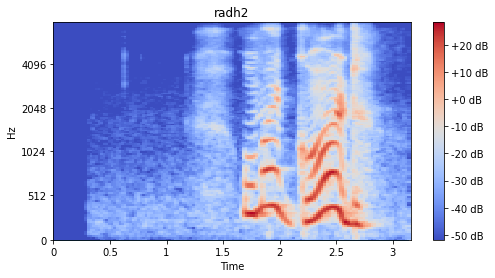

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/Recordings/F1_happy.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Recording_2_Radh')
plt.savefig('Radh2.png')
sf.write('/content/drive/MyDrive/Recording_OP/radh2.wav', x, sr)
Audio(data=x, rate=sr)
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('radh2')
plt.savefig('radh2.png')
plt.colorbar(format='%+2.0f dB');
i = '/content/radh2.png'
image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
image=np.array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

y_pred=reconstructed_model.predict(image)
y_pred
k = np.argmax(y_pred)
labels[k]

'happy'

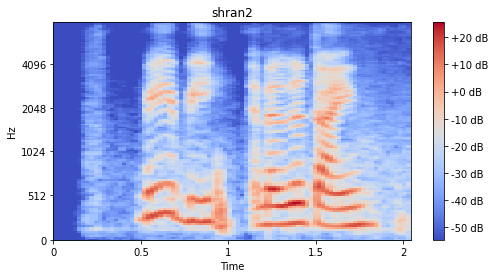

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/Recordings/F2_Neutral.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('F2_shran2')
plt.savefig('shran2.png')
sf.write('/content/drive/MyDrive/Recording_OP/shran2.wav', x, sr)
Audio(data=x, rate=sr)
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('shran2')
plt.savefig('shran2.png')
plt.colorbar(format='%+2.0f dB');
i = '/content/shran2.png'
image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
image=np.array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

y_pred=reconstructed_model.predict(image)
y_pred
k = np.argmax(y_pred)
labels[k]

'angry'

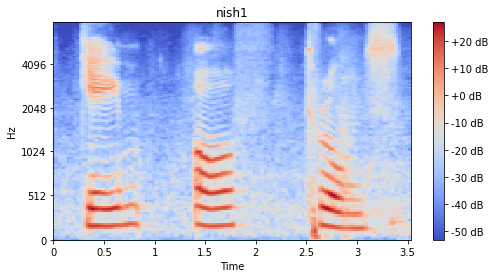

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/Recordings/F3_neutral1.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('F3_nish1')
plt.savefig('nish1.png')
sf.write('/content/drive/MyDrive/Recording_OP/nish1.wav', x, sr)
Audio(data=x, rate=sr)
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('nish1')
plt.savefig('nish1.png')
plt.colorbar(format='%+2.0f dB');
i = '/content/nish1.png'
image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
image=np.array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

y_pred=reconstructed_model.predict(image)
y_pred
k = np.argmax(y_pred)
labels[k]

'happy'

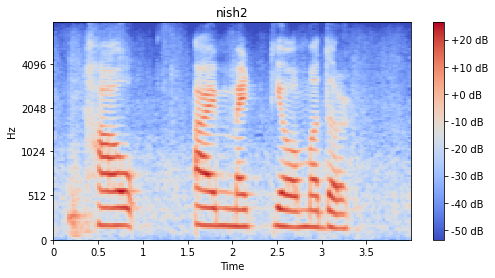

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/Recordings/F3_neutral2.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('F3_nish2')
plt.savefig('nish2.png')
sf.write('/content/drive/MyDrive/Recording_OP/nish2.wav', x, sr)
Audio(data=x, rate=sr)
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('nish2')
plt.savefig('nish2.png')
plt.colorbar(format='%+2.0f dB');
i = '/content/nish2.png'
image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
image=np.array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

y_pred=reconstructed_model.predict(image)
y_pred
k = np.argmax(y_pred)
labels[k]

'happy'

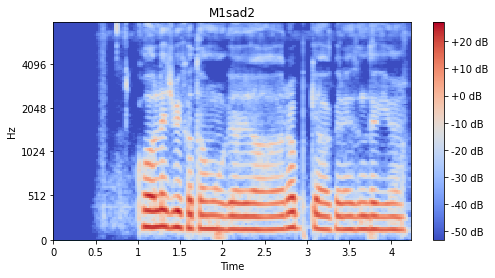

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/Recordings/Sad2_Jatin.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('M1sad2')
plt.savefig('M1sad2.png')
sf.write('/content/drive/MyDrive/Recording_OP/M1sad2.wav', x, sr)
Audio(data=x, rate=sr)
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('M1sad2')
plt.savefig('M1sad2.png')
plt.colorbar(format='%+2.0f dB');
i = '/content/M1sad2.png'
image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
image=np.array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

y_pred=reconstructed_model.predict(image)
y_pred
k = np.argmax(y_pred)
labels[k]

'happy'

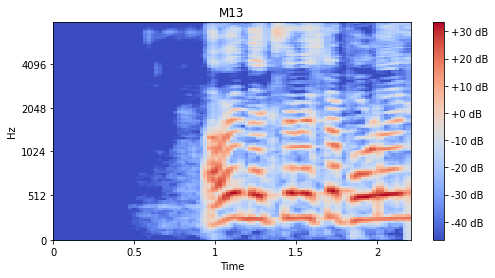

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/Recordings/Happy_jatin.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('M13')
plt.savefig('M13.png')
sf.write('/content/drive/MyDrive/Recording_OP/M13.wav', x, sr)
Audio(data=x, rate=sr)
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('M13')
plt.savefig('M13.png')
plt.colorbar(format='%+2.0f dB');
i = '/content/M13.png'
image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
image=np.array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

y_pred=reconstructed_model.predict(image)
y_pred
k = np.argmax(y_pred)
labels[k]

'angry'

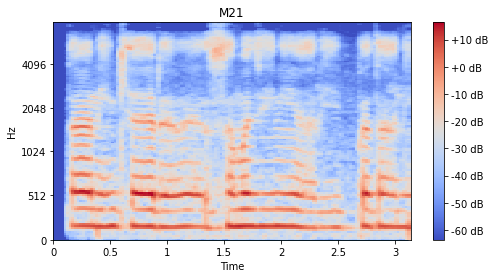

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/Recordings/Angry_Sachin.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('M21')
plt.savefig('M21.png')
sf.write('/content/drive/MyDrive/Recording_OP/M21.wav', x, sr)
Audio(data=x, rate=sr)
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('M21')
plt.savefig('M21.png')
plt.colorbar(format='%+2.0f dB');
i = '/content/M21.png'
image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
image=np.array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

y_pred=reconstructed_model.predict(image)
y_pred
k = np.argmax(y_pred)
labels[k]

'fearful'

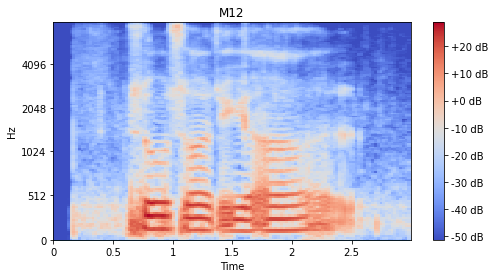

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/Recordings/Scared_Jatin.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('M12')
plt.savefig('M12.png')
sf.write('/content/drive/MyDrive/Recording_OP/M12.wav', x, sr)
Audio(data=x, rate=sr)
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('M12')
plt.savefig('M12.png')
plt.colorbar(format='%+2.0f dB');
i = '/content/M12.png'
image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
image=np.array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

y_pred=reconstructed_model.predict(image)
y_pred
k = np.argmax(y_pred)
labels[k]

'happy'

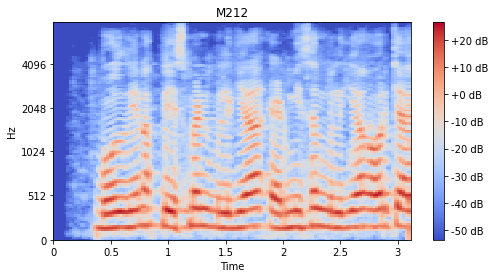

In [ ]:
x, sr = librosa.load('/content/drive/MyDrive/Recordings/Happy_sachin.wav')
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('M212')
plt.savefig('M212.png')
sf.write('/content/drive/MyDrive/Recording_OP/M212.wav', x, sr)
Audio(data=x, rate=sr)
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)

librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('M212')
plt.savefig('M212.png')
plt.colorbar(format='%+2.0f dB');
i = '/content/M212.png'
image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (224,224))
image=np.array(image)
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

y_pred=reconstructed_model.predict(image)
y_pred
k = np.argmax(y_pred)
labels[k]